# Data Mining Practice Project

#### This project was written by:
- Kyrsti Fitts
- Shivani Merchant
- Kevin Reynolds
- Ryan Espejo

#### Run Setup
- Use the most recent versions of Pandas and Scikit-learn

<br><br><br>
##### Step 1: Load the data
- For the first step of this project, we will load the data from the data files.
- The data will be loaded into a pandas data frame.
- The data frame will be the data structure that holds our data.
- Add attribute name rows for the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import Binarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Load the data (replace with the actual paths to your data files) and create attribute name row
attribute_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']
training_data = pd.read_csv('adult/training_data.csv', names = attribute_names)
test_data = pd.read_csv('adult/test_data.csv', names=attribute_names)

# Print number of rows and colums
training_rows_length, training_columns_length = training_data.shape
test_rows_length, test_columns_length = test_data.shape


print(f"Training Data Set: Read in {training_rows_length} rows and {training_columns_length} columns")
print(f"Test Data Set: Read in {test_rows_length} rows and {test_columns_length} columns")
print(training_data.head())

Training Data Set: Read in 32561 rows and 15 columns
Test Data Set: Read in 16281 rows and 15 columns
   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-p

<br><br>
#### Step 1 Continued: Remove rows containing unknown data
- Replace '?' characters with pandas 'NA' objects.
- Use the "dropna()" method to remove the rows.

In [2]:
# Remove records with unknown "?" values
training_data = training_data.replace(' ?', pd.NA)
training_data = training_data.dropna()

test_data = test_data.replace(' ?', pd.NA)
test_data = test_data.dropna()

# Remove period from income in the test data
test_data = test_data.replace(' <=50K.', ' <=50K')
test_data = test_data.replace(' >50K.', ' >50K')

# Display results
print(f"Training Data Set: Removed {training_rows_length - training_data.shape[0]} rows containing unknown values")
print(f"Test Data Set: Removed {test_rows_length - test_data.shape[0]} rows containing unknown values")

Training Data Set: Removed 2399 rows containing unknown values
Test Data Set: Removed 1221 rows containing unknown values


#### Step 1 Continued: Remove All Continuous Attributes
- Continuous Attrbutes: age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week
- Drop these attributes from both pandas data frames

In [3]:
print("Training dataset columns before continuous attribute deletion")
print(training_data.columns)
print("Test dataset columns before continuous attribute deletion")
print(test_data.columns)

training_data.drop('age',inplace = True, axis=1)
training_data.drop('fnlwgt',inplace = True, axis=1)
training_data.drop('education-num',inplace = True, axis=1)
training_data.drop('capital-gain',inplace = True, axis=1)
training_data.drop('capital-loss',inplace = True, axis=1)
training_data.drop('hours-per-week',inplace = True, axis=1)

test_data.drop('age',inplace = True, axis=1)
test_data.drop('fnlwgt',inplace = True, axis=1)
test_data.drop('education-num',inplace = True, axis=1)
test_data.drop('capital-gain',inplace = True, axis=1)
test_data.drop('capital-loss',inplace = True, axis=1)
test_data.drop('hours-per-week',inplace = True, axis=1)

print("Training dataset columns after continuous atribute deletion")
print(training_data.columns)
print("Test dataset columns after continuous atribute deletion")
print(test_data.columns)


Training dataset columns before continuous attribute deletion
Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')
Test dataset columns before continuous attribute deletion
Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')
Training dataset columns after continuous atribute deletion
Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'class'],
      dtype='object')
Test dataset columns after continuous atribute deletion
Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'nativ

#### Step 1 Continued: Use one-hot encoding to transform data on each multi-domain categorial attribute
- Using scikit-learn to one-hot encode all the categorical data into numerical data so that it can be used in the algorithms for the next steps
- doing this on the training data

In [4]:
# One hot encoding on the training and test data
training_data = pd.get_dummies(training_data)
test_data = pd.get_dummies(test_data)

# Printing new data head with encoded categorical data
print("Training Data:")
print(training_data.head())

Training Data:
   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                   False                 False               False   
1                   False                 False               False   
2                   False                 False                True   
3                   False                 False                True   
4                   False                 False                True   

   workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  workclass_ State-gov  \
0                    False                        False                  True   
1                    False                         True                 False   
2                    False                        False                 False   
3                    False                        False                 False   
4                    False                        False                 False   

   workclass_ Without-pay  education_ 10th  education_ 11th  education_

<br><br>
##### Step 2: Build a decision tree classifier
- Separate the targets (income) into two separate dataframes
- X_train = all columns except income
- Y_train = only the income columns
- Create and fit the decision tree classifier
- Print a classification report
- Print a confusion matrix

              precision    recall  f1-score   support

class_ <=50K       0.86      0.89      0.88     11360
 class_ >50K       0.63      0.56      0.59      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.73      0.74     15060
weighted avg       0.81      0.81      0.81     15060

Confusion Matrix:
[[10160  1200]
 [ 1636  2064]]

10160 -> Accurately predicted income >50K
2064 -> Accurately predicted income <=50K
1636 -> Incorrectly predicted income to be >50K when it was actually <=50K
1200 -> Incorrectly predicted income to be <=50K when is was actually >50k


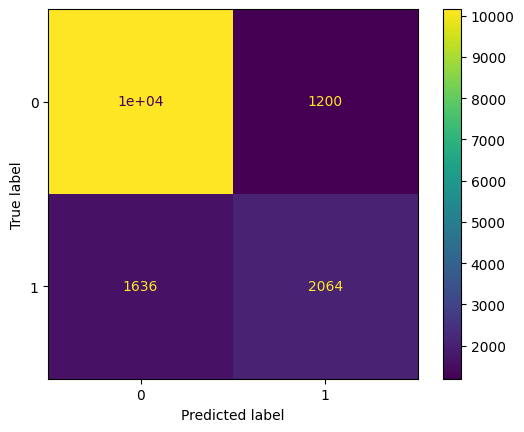

In [5]:
# Separate the target variables in training_data
X_train = training_data.drop(columns=["class_ <=50K", "class_ >50K"])
y_train = training_data[["class_ <=50K", "class_ >50K"]]

# Separate the target variables in test_data
X_test = test_data.drop(columns=["class_ <=50K", "class_ >50K"])
y_test = test_data[["class_ <=50K", "class_ >50K"]].idxmax(axis=1)

# Add missing column and match order
X_test['native-country_ Holand-Netherlands'] = 0
X_test = X_test[X_train.columns]

# Create a decision tree classifier and fit it to the training data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict the targets of the test data
y_test_prediction = clf.predict(X_test)

# Get the index of the maximum value in each row to get the predicted class labels
y_test_prediction = pd.DataFrame(y_test_prediction, columns=["class_ <=50K", "class_ >50K"]).idxmax(axis=1)

# Print classification report
print(classification_report(y_test, y_test_prediction))

# Create confusion matrix
cm = confusion_matrix(y_test, y_test_prediction, labels=y_test.unique())

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

print("\n" + str(cm[0][0])+ " -> Accurately predicted income >50K")
print(str(cm[1][1]) + " -> Accurately predicted income <=50K")
print(str(cm[1][0]) + " -> Incorrectly predicted income to be >50K when it was actually <=50K")
print(str(cm[0][1]) + " -> Incorrectly predicted income to be <=50K when is was actually >50k")

# More fancy way of displaying the matrix graphically
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

<br></br>
##### Step 3: Build a Naive Bayesian Classifier
- Separate the targets (income) into two separate dataframes
- X_train_nb = all columns except income
- Y_train_nb = only one income column
- Create and fit the naive bayesian classifier
- Print a classification report
- Print a confusion matrix

              precision    recall  f1-score   support

       False       0.56      0.74      0.64      3700
        True       0.91      0.81      0.86     11360

    accuracy                           0.79     15060
   macro avg       0.73      0.78      0.75     15060
weighted avg       0.82      0.79      0.80     15060

Confusion Matrix:
[[9220 2140]
 [ 962 2738]]

9220 -> Accurately predicted income >50K
2738 -> Accurately predicted income <=50K
962 -> Incorrectly predicted income to be >50K when it was actually <=50K
2140 -> Incorrectly predicted income to be <=50K when is was actually >50k


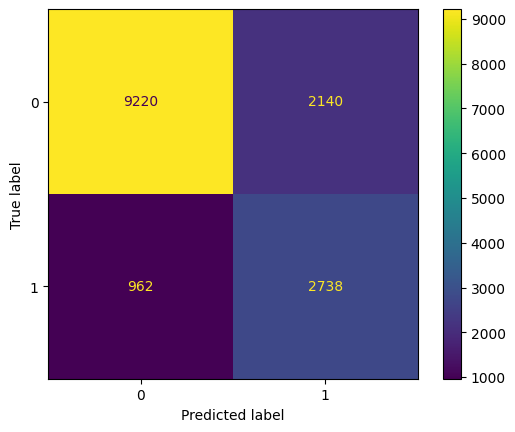

In [6]:
# Separate the target variables in training_data
X_train_nb = training_data.drop(columns=["class_ <=50K", "class_ >50K"])
y_train_nb = training_data["class_ <=50K"]

# Separate the target variables in test_data
X_test_nb = test_data.drop(columns=["class_ <=50K", "class_ >50K"])
y_test_nb = test_data["class_ <=50K"]

# Add missing column and match order
X_test_nb['native-country_ Holand-Netherlands'] = 0
X_test_nb = X_test_nb[X_train_nb.columns]

# Create a Naive Bayesian Classifier and fit it to the training data
clf = MultinomialNB()
clf.fit(X_train_nb, y_train_nb)

# Predict the targets of the test data
y_test_prediction_nb = clf.predict(X_test_nb)

# Print classification report
print(classification_report(y_test_nb, y_test_prediction_nb))

# Create confusion matrix
cm_nb = confusion_matrix(y_test_nb, y_test_prediction_nb, labels=y_test_nb.unique())

# Print the confusion matrix
print("Confusion Matrix:")
print(cm_nb)

print("\n" + str(cm_nb[0][0])+ " -> Accurately predicted income >50K")
print(str(cm_nb[1][1]) + " -> Accurately predicted income <=50K")
print(str(cm_nb[1][0]) + " -> Incorrectly predicted income to be >50K when it was actually <=50K")
print(str(cm_nb[0][1]) + " -> Incorrectly predicted income to be <=50K when is was actually >50k")

# More fancy way of displaying the matrix graphically
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp.plot()
plt.show()


#### Step 4: Setting up for task 2 by loading data and removing records with unknown (?) values
- Replace '?' characters with pandas 'NA' objects.
- Use the "dropna()" method to remove the rows.

In [7]:
training_data_2 = pd.read_csv('adult/training_data.csv', names = attribute_names)
test_data_2 = pd.read_csv('adult/test_data.csv', names=attribute_names)

# Print number of rows and colums
training_rows_length, training_columns_length = training_data_2.shape
test_rows_length, test_columns_length = test_data_2.shape


print(f"Training Data Set: Read in {training_rows_length} rows and {training_columns_length} columns")
print(f"Test Data Set: Read in {test_rows_length} rows and {test_columns_length} columns")

# Remove records with unknown "?" values
training_data_2 = training_data_2.replace(' ?', pd.NA)
training_data_2 = training_data_2.dropna()

test_data_2 = test_data_2.replace(' ?', pd.NA)
test_data_2 = test_data_2.dropna()

# Remove period from income in the test data
test_data_2 = test_data_2.replace(' <=50K.', ' <=50K')
test_data_2 = test_data_2.replace(' >50K.', ' >50K')

print(test_data_2['class'])

# Display results
print(f"Training Data Set: Removed {training_rows_length - training_data_2.shape[0]} rows containing unknown values")
print(f"Test Data Set: Removed {test_rows_length - test_data_2.shape[0]} rows containing unknown values")

Training Data Set: Read in 32561 rows and 15 columns
Test Data Set: Read in 16281 rows and 15 columns
0         <=50K
1         <=50K
2          >50K
3          >50K
5         <=50K
          ...  
16275     <=50K
16276     <=50K
16278     <=50K
16279     <=50K
16280      >50K
Name: class, Length: 15060, dtype: object
Training Data Set: Removed 2399 rows containing unknown values
Test Data Set: Removed 1221 rows containing unknown values


#### Step 4 Continued: Keep setting up for task 2 by using one-hot encoding and the mean value to transform the fresh data
- Using scikit-learn to one-hot encode all the categorical data into numerical data so that it can be used in the algorithms for the next steps
- Use mean value for the continuous attributes to convert the numerical values into binary

In [8]:
# One hot encoding on the training and test data
training_data_2 = pd.get_dummies(training_data_2)
test_data_2 = pd.get_dummies(test_data_2)

test_data_2['native-country_ Holand-Netherlands'] = 0
test_data_2 = test_data_2[training_data_2.columns]

# Pick the columns to binarize
columns_to_binarize = ['age','education-num','capital-gain','capital-loss','hours-per-week']

# Calculate the mean values for each feature (column)
training_means = training_data_2[columns_to_binarize].mean()
testing_means = test_data_2[columns_to_binarize].mean()

for column in columns_to_binarize:
    training_binarizer = Binarizer(threshold=training_means[column])
    testing_binarizer = Binarizer(threshold=testing_means[column])

    training_data_2[column] = training_binarizer.transform(training_data_2[[column]].values)
    test_data_2[column] = testing_binarizer.transform(test_data_2[[column]].values)

# Printing new data head with transformed data
print("Training Data:")
print(training_data_2.head())
print("Testing Data:")
print(test_data_2.head())

Training Data:
   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0    1   77516              1             1             0               0   
1    1   83311              1             0             0               0   
2    0  215646              0             0             0               0   
3    1  234721              0             0             0               0   
4    0  338409              1             0             0               0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                   False                 False               False   
1                   False                 False               False   
2                   False                 False                True   
3                   False                 False                True   
4                   False                 False                True   

   workclass_ Self-emp-inc  ...  native-country_ Scotland  \
0                    False  ...   

#### Step 5: K-means Clustering
- Use K-means to cluster data
- Print centroids of the clusters

In [9]:
k_values = [3, 5, 10]
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(training_data_2)
    centroids = kmeans.cluster_centers_
    print(f"\nCentroids for k={k}:")
    print(centroids)


Centroids for k=3:
[[ 4.56078325e-01  2.05499192e+05  3.24585260e-01  8.19961925e-02
   4.60973620e-02  3.00584716e-01  2.58362796e-02  7.09137884e-02
   7.56323089e-01  3.31792222e-02  7.56051129e-02  3.76665760e-02
   4.75931466e-04  2.70601033e-02  3.65787327e-02  1.08784335e-02
   4.48735382e-03  1.03345118e-02  1.79494153e-02  1.48218657e-02
   3.54228991e-02  4.09980963e-02  1.65216209e-01  1.13543650e-02
   3.33152026e-01  5.37802556e-02  1.76774544e-03  1.78134349e-02
   2.18384553e-01  1.39855861e-01  4.75931466e-04  4.60361708e-01
   1.27821594e-02  3.26556976e-01  3.18874082e-02  2.80799565e-02
   1.24762034e-01  4.07941256e-04  1.32920859e-01  1.27957574e-01
   2.59722600e-02  4.83410389e-02  7.24095730e-02  1.05724776e-01
   4.41936361e-03  1.30609192e-01  2.35246125e-02  1.21430514e-01
   2.94397607e-02  5.20805004e-02  4.09980963e-01  2.53467501e-01
   3.16834376e-02  1.53929834e-01  1.06880609e-01  4.40576557e-02
   5.50720696e-03  2.05330432e-02  9.95376666e-02  9.110

#### Step 6: kNN Algorithm
- Separate the targets (income) into two separate dataframes
- X_train = all columns except income
- Y_train = only one income column
- Create and fit the kNN algorithm
- Print the three prediction accuracies

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [3, 5, 10]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    X_train = training_data_2.drop(columns=["class_ <=50K", "class_ >50K"]).to_numpy()
    y_train = training_data_2["class_ <=50K"].to_numpy()
    
    X_test = test_data_2.tail(10).drop(columns=["class_ <=50K", "class_ >50K"]).to_numpy()
    y_test = test_data_2.tail(10)["class_ <=50K"].to_numpy()

    # Fit the kNN model
    knn.fit(X_train, y_train)

    # Predict on the test data
    y_pred = knn.predict(X_test)

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Prediction Accuracy for k={k}: {accuracy}")



Prediction Accuracy for k=3: 0.7
Prediction Accuracy for k=5: 0.9
Prediction Accuracy for k=10: 0.9


#### Step 7: SVM Classifier
- Separate the targets (income) into two separate dataframes
- X_train_svm = all columns except income
- Y_train_svm = only one income column
- Create and fit to the SVM Classifier
- Print the prediction accuracy

In [11]:
from sklearn.svm import SVC


# Split the dataset into features (X) and labels (y)
X_train_svm = training_data_2.drop(columns=["class_ <=50K", "class_ >50K"])
y_train_svm = training_data_2["class_ <=50K"]

X_test_svm = test_data_2.drop(columns=["class_ <=50K", "class_ >50K"])
y_test_svm = test_data_2["class_ <=50K"]

# Create an SVM classifier 
svm_classifier = SVC()

# Fit the classifier to the training data
svm_classifier.fit(X_train_svm, y_train_svm)

# Predict on the test data
y_pred_svm = svm_classifier.predict(X_test_svm)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test_svm, y_pred_svm)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 75.43%
